In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn import metrics


In [2]:
#load the dataset
file =pd.read_csv(r'C:\Users\Dell\LEFTPOCKET.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315000 entries, 0 to 314999
Data columns (total 12 columns):
sno              315000 non-null int64
Ax               315000 non-null float64
Ay               315000 non-null float64
Az               315000 non-null float64
Gx               315000 non-null float64
Gy               315000 non-null float64
Gz               315000 non-null float64
Mx               315000 non-null float64
My               315000 non-null float64
Mz               315000 non-null float64
Activitylabel    315000 non-null object
USERID           315000 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 28.8+ MB


# Data Preprocessing & feature extraction 

In [4]:
#missing value

file.isnull().sum()

sno              0
Ax               0
Ay               0
Az               0
Gx               0
Gy               0
Gz               0
Mx               0
My               0
Mz               0
Activitylabel    0
USERID           0
dtype: int64

In [5]:
df = file
df['A'] = ( df['Ax']**2 + df['Ay']**2 + df['Az']**2 ) **0.5
df['G'] = ( df['Gx']**2 + df['Gy']**2 + df['Gz']**2 ) **0.5
df['M'] = ( df['Mx']**2 + df['My']**2 + df['Mz']**2 ) **0.5

df.head()

,sno,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Activitylabel,USERID,A,G,M
0,0,2.41080,-15.6230,-2.31550,-3.0446,0.49022,0.075136,12.66,43.26,0.72,walking,U1,15.976596,3.084729,45.080169
1,1,2.69680,-12.0270,-1.67530,-2.6081,-0.12553,-0.020464,13.02,43.26,1.80,walking,U1,12.438975,2.611199,45.212697
2,2,0.21793,-9.0575,0.40861,-1.9251,-0.12217,0.137140,13.74,43.26,4.38,walking,U1,9.069331,1.933841,45.600434
3,3,0.92618,-7.7772,0.69464,-1.3787,0.80451,0.782820,14.52,43.02,6.96,walking,U1,7.862899,1.777880,45.934654
4,4,0.80360,-6.5105,1.25310,-1.4184,0.38485,0.476470,14.70,42.84,8.34,walking,U1,6.678521,1.544989,46.053352


In [6]:
scaled_X = df

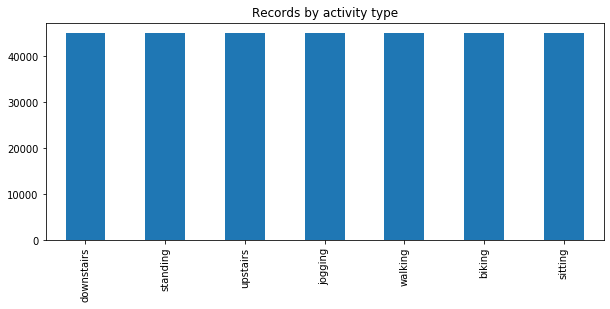

In [7]:
scaled_X['Activitylabel'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

In [8]:
overlap = .5
data = scaled_X

wsize = 50 * 5


newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]

newdata = newdataset.rolling(wsize, int(wsize/2)).mean().add_suffix('_mean')
data = data.join(newdata)

data = data.iloc[int(wsize*overlap)::int(wsize*overlap)]

data = data.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data

,sno,Activitylabel,USERID,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,My_mean,Mz_mean,A_mean,G_mean,M_mean
125,125,walking,U1,0.305698,-9.615410,-0.660154,-0.099972,0.072984,0.124565,15.547143,40.651429,10.161429,10.807489,2.281649,46.037016
250,250,walking,U1,0.233233,-9.871737,-0.729456,-0.008067,-0.054145,0.098507,18.387600,39.960240,12.330240,11.109507,2.320253,47.233931
375,375,walking,U1,0.112777,-10.097389,-0.778275,0.092926,-0.137821,0.058042,18.134880,40.633200,14.188080,11.307795,2.280174,48.308396
500,500,walking,U1,0.231929,-9.989087,-0.527059,-0.077682,0.003107,0.099850,15.932160,40.565760,11.522160,11.195509,2.295127,46.774039
625,625,walking,U1,0.565735,-9.830722,-0.628881,-0.142759,0.076921,0.143929,16.577760,40.771440,10.627440,11.297708,2.346426,47.043159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,1.651440,-9.731902,-1.703307,-0.110408,0.116791,0.086124,-11.566800,31.028880,24.230400,10.596028,1.677109,42.179615
314500,314500,downstairs,U5,1.661246,-9.913713,-1.733327,-0.017284,0.216963,0.091126,-13.833360,30.420240,22.974480,10.801313,1.669343,41.591278
314625,314625,downstairs,U5,1.639669,-10.135121,-1.138167,-0.197300,0.568798,0.173765,-11.666880,33.237120,4.694160,10.859693,1.723258,44.022084
314750,314750,downstairs,U5,1.668001,-9.908476,-1.310001,-0.064837,0.359850,0.123323,-0.394800,37.146480,-8.193120,10.683200,1.791149,42.870753


In [9]:
data1 = scaled_X

In [10]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]



newdata = newdataset.rolling(wsize, int(wsize/2)).var().add_suffix('_var')
data1 = data1.join(newdata)


data1 = data1.iloc[int(wsize*overlap)::int(wsize*overlap)]
data1 = data1.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data1

,sno,Activitylabel,USERID,Ax_var,Ay_var,Az_var,Gx_var,Gy_var,Gz_var,Mx_var,My_var,Mz_var,A_var,G_var,M_var
125,125,walking,U1,6.862852,19.084553,18.147146,2.979176,2.629814,0.440243,2.956240,7.398012,114.559630,20.087558,0.832747,2.038810
250,250,walking,U1,7.534381,20.771940,20.290693,2.977432,2.803864,0.445507,10.430980,9.184641,128.595795,23.111612,0.834359,3.547943
375,375,walking,U1,8.120794,21.486095,19.802821,3.029356,2.564367,0.424357,13.437002,11.108832,130.199136,24.017609,0.829130,1.663976
500,500,walking,U1,7.803992,21.962498,16.933865,3.315900,2.370724,0.435056,4.908870,10.875610,143.608434,21.373067,0.848998,3.131901
625,625,walking,U1,8.077327,27.414016,20.077064,3.242741,2.647679,0.448802,2.962932,12.818608,151.907699,25.167244,0.858598,4.050799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,5.370869,15.566028,7.888776,2.640910,1.157898,0.132963,30.431579,36.573159,34.261295,16.840352,1.141159,5.457420
314500,314500,downstairs,U5,4.750547,16.491586,8.794388,2.179067,1.301156,0.277489,32.031928,26.633046,28.393516,17.363323,1.015714,1.461254
314625,314625,downstairs,U5,4.308876,12.449383,6.558904,1.845333,1.357230,0.404607,206.905588,107.093977,383.630531,12.043741,1.019853,19.832430
314750,314750,downstairs,U5,5.139412,13.057632,6.339918,2.504134,1.344566,0.302909,239.723608,93.002286,98.264846,13.036415,1.080012,38.664002


In [11]:
datanew = pd.merge(data, data1, on="sno")
datanew = datanew.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew.columns

Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_mean', 'Ay_mean', 'Az_mean',
       'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean',
       'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var',
       'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var',
       'M_var'],
      dtype='object')

In [12]:
data2 = scaled_X

In [13]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).std().add_suffix('_std')
data2 = data2.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data2 = data2.iloc[int(wsize*overlap)::int(wsize*overlap)]
data2 = data2.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data2

,sno,Activitylabel,USERID,Ax_std,Ay_std,Az_std,Gx_std,Gy_std,Gz_std,Mx_std,My_std,Mz_std,A_std,G_std,M_std
125,125,walking,U1,2.619705,4.368587,4.259947,1.726029,1.621670,0.663508,1.719372,2.719929,10.703253,4.481915,0.912550,1.427869
250,250,walking,U1,2.744883,4.557624,4.504519,1.725524,1.674474,0.667463,3.229703,3.030617,11.340009,4.807454,0.913433,1.883598
375,375,walking,U1,2.849701,4.635310,4.450036,1.740505,1.601364,0.651427,3.665652,3.332991,11.410484,4.900776,0.910566,1.289952
500,500,walking,U1,2.793563,4.686416,4.115078,1.820961,1.539716,0.659588,2.215597,3.297819,11.983674,4.623101,0.921411,1.769718
625,625,walking,U1,2.842064,5.235840,4.480744,1.800761,1.627169,0.669927,1.721317,3.580308,12.325084,5.016697,0.926606,2.012660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,2.317514,3.945381,2.808696,1.625088,1.076057,0.364641,5.516483,6.047575,5.853315,4.103700,1.068251,2.336112
314500,314500,downstairs,U5,2.179575,4.060983,2.965533,1.476166,1.140682,0.526773,5.659676,5.160721,5.328557,4.166932,1.007827,1.208823
314625,314625,downstairs,U5,2.075783,3.528368,2.561036,1.358430,1.165002,0.636087,14.384213,10.348622,19.586488,3.470409,1.009878,4.453362
314750,314750,downstairs,U5,2.267027,3.613535,2.517919,1.582446,1.159554,0.550372,15.483010,9.643769,9.912863,3.610598,1.039236,6.218038


In [14]:
data3 = scaled_X

In [15]:
overlap = .5
data3 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).median().add_suffix('_median')
data3 = data3.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data3 = data3.iloc[int(wsize*overlap)::int(wsize*overlap)]
data3 = data3.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data3

,sno,Activitylabel,USERID,Ax_median,Ay_median,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
125,125,walking,U1,0.06810,-9.44570,-0.068100,0.056810,-0.077885,0.184635,15.57,40.38,10.95,10.282848,2.293105,46.682410
250,250,walking,U1,0.10896,-9.51380,0.013621,0.146910,-0.169820,0.114230,18.18,40.11,14.31,10.396561,2.323347,46.966933
375,375,walking,U1,0.11577,-9.78620,0.034051,0.306500,-0.263890,-0.005193,19.20,40.86,16.02,10.626818,2.273686,48.330791
500,500,walking,U1,0.14982,-9.74535,0.190680,0.206470,0.013133,0.030544,16.08,40.68,11.28,10.665128,2.215645,46.733761
625,625,walking,U1,0.62654,-9.58870,0.143010,0.014661,0.116370,0.125835,16.56,40.80,11.79,10.446569,2.225133,47.018542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,1.65490,-8.86680,-1.797900,0.070250,0.111940,0.085980,-12.06,31.68,23.76,9.619852,1.375476,41.762435
314500,314500,downstairs,U5,1.83870,-9.11885,-1.757000,0.141875,0.091934,0.049785,-13.20,31.86,22.20,9.862141,1.444252,41.810766
314625,314625,downstairs,U5,1.71615,-9.77940,-0.946610,0.028252,0.386525,0.078954,-12.60,33.18,7.65,10.250610,1.485283,42.553559
314750,314750,downstairs,U5,1.68890,-9.61600,-1.225800,0.221290,0.203420,0.059407,7.02,39.36,-8.91,10.153301,1.603423,42.560899


In [16]:
datanew1 = pd.merge(data2, data3, on="sno")
datanew1 = datanew1.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew1.columns


Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_std', 'Ay_std', 'Az_std',
       'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std',
       'G_std', 'M_std', 'Ax_median', 'Ay_median', 'Az_median', 'Gx_median',
       'Gy_median', 'Gz_median', 'Mx_median', 'My_median', 'Mz_median',
       'A_median', 'G_median', 'M_median'],
      dtype='object')

In [17]:
datanew2 = pd.merge(datanew, datanew1, on="sno")
datanew2 = datanew2.drop(['Activitylabel_x_y','USERID_x_y'],axis=1)
datanew2.columns

Index(['sno', 'Activitylabel_x_x', 'USERID_x_x', 'Ax_mean', 'Ay_mean',
       'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean',
       'Mz_mean', 'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var',
       'Gx_var', 'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var',
       'G_var', 'M_var', 'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std',
       'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std',
       'Ax_median', 'Ay_median', 'Az_median', 'Gx_median', 'Gy_median',
       'Gz_median', 'Mx_median', 'My_median', 'Mz_median', 'A_median',
       'G_median', 'M_median'],
      dtype='object')

In [75]:
df = datanew2.loc[datanew2['Activitylabel_x_x'] == 'standing']
df

,sno,Activitylabel_x_x,USERID_x_x,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,...,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
71,9000,standing,U1,0.120403,-9.906184,-0.664340,0.094920,-0.081587,0.062674,18.41976,...,0.24517,0.404240,-0.458145,-0.018631,18.15,33.75,11.28,10.274404,2.134032,41.985639
72,9125,standing,U1,-0.041787,-9.642935,-2.096715,-0.008921,-0.030566,0.028362,-0.46752,...,-3.56850,-0.002902,-0.011148,-0.001374,-18.15,39.90,18.60,10.012993,0.133545,47.592596
73,9250,standing,U1,-0.218798,-9.325146,-3.621108,-0.001778,-0.008254,-0.001934,-18.53184,...,-3.60940,-0.002596,-0.000764,-0.001222,-18.48,39.84,18.72,10.006164,0.020876,47.727614
74,9375,standing,U1,-0.232583,-9.323565,-3.616910,-0.001356,0.004221,-0.001421,-18.46320,...,-3.60940,-0.002138,0.003971,0.000000,-18.45,39.78,19.02,10.003795,0.010598,47.787354
75,9500,standing,U1,-0.259225,-9.318880,-3.622575,-0.001966,0.003553,0.000130,-18.36048,...,-3.62300,-0.002138,0.003818,0.000305,-18.33,39.78,19.14,10.003289,0.007829,47.810005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,269375,standing,U5,2.890237,-9.720901,-0.676608,-0.002896,0.048841,-0.004390,-36.71976,...,-1.32120,0.020616,0.040011,-0.002291,-37.92,32.52,-1.20,10.272529,0.191903,49.898901
2155,269500,standing,U5,3.283262,-9.618252,-1.373483,-0.055431,0.019698,-0.028426,-38.09160,...,-1.37570,-0.003818,0.010537,-0.001527,-38.40,32.40,-1.02,10.275652,0.066443,50.191085
2156,269625,standing,U5,2.929080,-9.740990,-0.747599,0.050755,-0.003975,0.031058,-36.79680,...,-1.31440,0.004429,-0.013134,0.004887,-38.16,32.64,-1.32,10.272590,0.102908,49.905557
2157,269750,standing,U5,2.369887,-9.923636,0.505150,0.055182,0.000832,0.023665,-34.54992,...,0.98748,0.015272,0.007025,-0.007941,-34.02,34.62,-10.02,10.284628,0.127563,49.568044


# split into train & test

In [76]:
X = df[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean',
       'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean', 'A_mean',
       'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var', 'Gy_var',
       'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var', 'M_var',
       'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std',
       'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std', 'Ax_median', 'Ay_median',
       'Az_median', 'Gx_median', 'Gy_median', 'Gz_median', 'Mx_median',
       'My_median', 'Mz_median', 'A_median', 'G_median', 'M_median']]
y = df['USERID_x_x']

In [77]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify = y)
X_train.shape,X_test.shape

((288, 48), (72, 48))

# train w/o feature selection

In [78]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

In [79]:
#train the model with light gradient boosting

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
lgb.fit(X_train, Y_train)

y_predict = lgb.predict(X_test)


# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.902778
Precision: 0.903276
Recall: 0.902778
F1 score: 0.902654


In [70]:
#train with random forest

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf = rnd_clf.fit(X_train, Y_train)

#evaluate accuracy
y_predict = rnd_clf.predict(X_test)


# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy2)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)


Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [51]:
#train with decision tree
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dr = DecisionTreeClassifier()
dr = dr.fit(X_train, Y_train)
y_predict = dr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy3)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

# skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, figsize = None)

# plt.show()

Accuracy: 0.972222
Precision: 0.975694
Recall: 0.972222
F1 score: 0.972651


# feature selection by RFE

In [80]:
#feature selection through RFE by using gradientboosting classifier
from sklearn.feature_selection import RFE

sel = RFE(RandomForestClassifier(n_estimators=100, random_state = 0), n_features_to_select = 7)
sel.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [81]:
features = X_train.columns[sel.get_support()]
features

Index(['Ax_mean', 'My_mean', 'Ax_median', 'My_median', 'Mz_median', 'A_median',
       'M_median'],
      dtype='object')

In [117]:
#train by random forest
def run_RandomForestClassifier(X_train,X_test,Y_train,Y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs=-1)
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [118]:
%%time
ar = run_RandomForestClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ar)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 0.961806
Recall: 0.958333
F1 score: 0.958267
Wall time: 387 ms


In [119]:
# train by decisiontree
def run_DecisionTreeClassifier(X_train,X_test,Y_train,Y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)



In [120]:
%%time
ad = run_DecisionTreeClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ad)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.986111
Precision: 0.961806
Recall: 0.958333
F1 score: 0.958267
Wall time: 11.4 ms


In [82]:
#lgbclassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier 
def run_LGBMClassifier(X_train,X_test,Y_train,Y_test):
    clf = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return (accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [83]:
%%time
lgm = run_LGBMClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % lgm)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.888889
Precision: 0.903276
Recall: 0.902778
F1 score: 0.902654
Wall time: 191 ms


# comparison chart with feature selection and without feature selection on different classifier

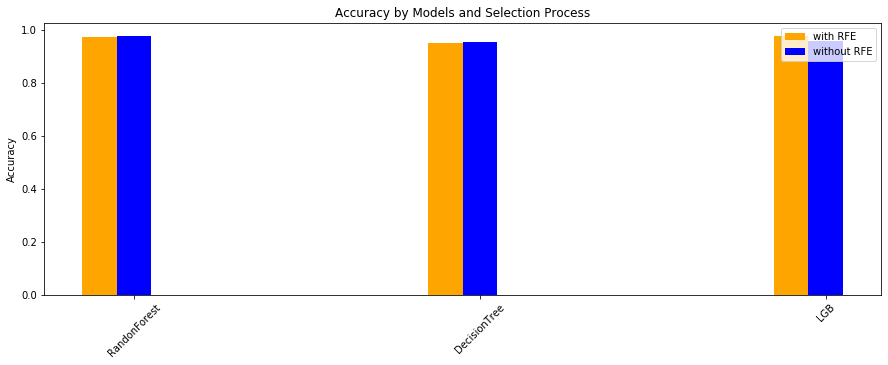

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Out_Accuracy2 = [ar,ad,lgm]
Out_Accuracy3 = [accuracy2,accuracy3,accuracy1]
Model_2 = ['RandonForest','DecisionTree','LGB']

ind =  np.arange(3)   # the x locations for the groupsx
width = 0.1  # the width of the bars


fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(ind, Out_Accuracy2, width, color='orange',label ='with RFE')
rects2 = ax.bar(ind + width ,Out_Accuracy3, width, color='b',label = 'without RFE')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_2,rotation=45)
plt.legend()
plt.show()